In [1]:
import numpy as np
import pandas as pd
import datetime
import time
import os
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.ensemble import RandomForestRegressor


print(os.listdir("../machine_learning"))

['.git', '.gitignore', '.ipynb_checkpoints', 'csv_results_to_geojson.ipynb', 'data_base', 'Evaluation Truncated Model Neural Network-FullData.ipynb', 'Evaluation Truncated Model Neural Network.ipynb', 'file.csv', 'get-pip.py', 'Images', 'Include', 'Lib', 'ML_Earthquake_Neuron-FullDataSet.ipynb', 'ML_Earthquake_Neuron_Trained with 20k.ipynb', 'ML_Earthquake_Neuron_Trained with Truncated Data with Months.ipynb', 'ML_Earthquake_Neuron_Trained with Truncated Data with Months_FullDataSet.ipynb', 'ML_Earthquake_Neuron_Trained with Truncated Data.ipynb', 'ML_Evaluating_Model.ipynb', 'ml_kellog_db.ipynb', 'ml_neuron_model_results.geojson', 'ml_results.csv', 'Model Information.docx', 'models', 'pyvenv.cfg', 'README.md', 'Scripts', '~$del Information.docx', '~WRL3962.tmp']


In [2]:
# Loading the Data

data = pd.read_csv("data_base/USGS_earthquakes/earthquakes_truncated_fulldata.csv")
data.head()

,month,latitude,longitude,depth,mag,id,place
0,1,-60,0,15,6.3,iscgem877909,Bouvet Island region
1,1,40,90,15,5.7,iscgem877920,"northern Xinjiang, China"
2,1,10,40,15,6.1,iscgemsup877930,Djibouti
3,1,50,30,40,5.4,iscgemsup877933,Romania
4,1,10,100,15,5.6,iscgem877954,"Nicobar Islands, India region"


In [3]:
data = data[['month','latitude', 'longitude', 'depth', 'mag']]
data.head()

,month,latitude,longitude,depth,mag
0,1,-60,0,15,6.3
1,1,40,90,15,5.7
2,1,10,40,15,6.1
3,1,50,30,40,5.4
4,1,10,100,15,5.6


In [4]:
#Displaying the Columns


#After you've removed day and year

mo_cat = CategoricalDtype(categories=[str(i) for i in range(1,13)], ordered=True)
data.month.astype(mo_cat)

data.columns


Index(['month', 'latitude', 'longitude', 'depth', 'mag'], dtype='object')

In [5]:
data.month.dtype

dtype('int64')

In [6]:
print(mo_cat)

category


Model Splitting 

In [7]:
#Splitting the data

X = data [['month','latitude', 'longitude']]
y = data [['depth', 'mag']]

In [8]:
#Splitting Xs and ys into traing and test datasets 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(60679, 3) (15170, 3) (60679, 2) (15170, 3)


In [9]:
#from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)



array([[332.22056114,   5.42493507],
       [ 55.88511552,   5.41108139],
       [ 61.57389075,   5.39319224],
       ...,
       [ 65.53038623,   5.47184344],
       [ 82.18268278,   5.34918337],
       [ 60.24662483,   5.34554431]])

In [10]:
# Print the Features that are going to be tested into the model

print(X_test)

       month  latitude  longitude
7168       4       -20       -180
49404     10        50        160
25569      8         0        130
2329       6         0        120
44281     11         0        140
...      ...       ...        ...
57647      7       -50         30
35164      7         0        140
46421      8       -10        170
56591      1        50        150
41875     11        10        130

[15170 rows x 3 columns]


In [11]:
# Calculating R Score

reg.score(X_test, y_test)


0.19418198131579484

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[332.02242577,   5.42543951],
       [ 55.41110853,   5.40771453],
       [ 61.29436502,   5.39635357],
       ...,
       [ 65.52050639,   5.46073602],
       [ 82.88651956,   5.35084957],
       [ 60.24247063,   5.34750464]])

In [13]:
#Creating the Best Fit 

best_fit.score(X_test, y_test)


0.19467708505635867

##Neural Network Model

In [14]:
#Creating the Nueron Network Model

from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
#Compile Model 
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

In [16]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.905124 using {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.737234 (0.313492) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.399852 (0.481551) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.905124 (0.121442) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.465549 (0.263443) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


In [17]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [18]:
# Fit the model

model.fit(X_train, y_train, batch_size=125, epochs=900, verbose=1, validation_data=(X_test, y_test))

Epoch 1/900
486/486 [==============================] - 1s 2ms/step - loss: 0.1375 - accuracy: 0.5332 - val_loss: 0.0030 - val_accuracy: 0.6365
Epoch 2/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.6579 - val_loss: 0.0030 - val_accuracy: 0.5556
Epoch 3/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.7230 - val_loss: 0.0030 - val_accuracy: 0.7643
Epoch 4/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.7541 - val_loss: 0.0030 - val_accuracy: 0.7507
Epoch 5/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.7606 - val_loss: 0.0029 - val_accuracy: 0.7574
Epoch 6/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.7740 - val_loss: 0.0029 - val_accuracy: 0.7846
Epoch 7/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.7853 - val_loss: 0.0030 - val_accuracy: 0.7299

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9218 - val_loss: 0.0029 - val_accuracy: 0.8770
Epoch 58/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9057 - val_loss: 0.0029 - val_accuracy: 0.9209
Epoch 59/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9204 - val_loss: 0.0029 - val_accuracy: 0.9277
Epoch 60/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9246 - val_loss: 0.0029 - val_accuracy: 0.9249
Epoch 61/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9225 - val_loss: 0.0029 - val_accuracy: 0.9247
Epoch 62/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9239 - val_loss: 0.0029 - val_accuracy: 0.9212
Epoch 63/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9228 - val_loss: 0.0029 - val_accuracy: 0.9274
Epoch

Epoch 114/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9235 - val_loss: 0.0029 - val_accuracy: 0.9295
Epoch 115/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9242 - val_loss: 0.0029 - val_accuracy: 0.9241
Epoch 116/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9181 - val_loss: 0.0029 - val_accuracy: 0.9237
Epoch 117/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9255 - val_loss: 0.0029 - val_accuracy: 0.9310
Epoch 118/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9266 - val_loss: 0.0029 - val_accuracy: 0.9295
Epoch 119/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9263 - val_loss: 0.0029 - val_accuracy: 0.9218
Epoch 120/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9249 - val_loss: 0.0029 - val_ac

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9292 - val_loss: 0.0029 - val_accuracy: 0.9298
Epoch 171/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9284 - val_loss: 0.0029 - val_accuracy: 0.9296
Epoch 172/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9299 - val_loss: 0.0029 - val_accuracy: 0.9221
Epoch 173/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9277 - val_loss: 0.0029 - val_accuracy: 0.9303
Epoch 174/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9291 - val_loss: 0.0029 - val_accuracy: 0.9325
Epoch 175/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9297 - val_loss: 0.0029 - val_accuracy: 0.9320
Epoch 176/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9290 - val_loss: 0.0029 - val_accuracy: 0.9295

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9317 - val_loss: 0.0029 - val_accuracy: 0.9331
Epoch 227/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9308 - val_loss: 0.0029 - val_accuracy: 0.9363
Epoch 228/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9292 - val_loss: 0.0029 - val_accuracy: 0.9331
Epoch 229/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9325 - val_loss: 0.0029 - val_accuracy: 0.9255
Epoch 230/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9283 - val_loss: 0.0029 - val_accuracy: 0.9331
Epoch 231/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9279 - val_loss: 0.0029 - val_accuracy: 0.9327
Epoch 232/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9317 - val_loss: 0.0029 - val_accuracy: 0.9322

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9330 - val_loss: 0.0029 - val_accuracy: 0.9342
Epoch 283/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9333 - val_loss: 0.0029 - val_accuracy: 0.9359
Epoch 284/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9333 - val_loss: 0.0029 - val_accuracy: 0.9360
Epoch 285/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9322 - val_loss: 0.0029 - val_accuracy: 0.9298
Epoch 286/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9316 - val_loss: 0.0029 - val_accuracy: 0.9278
Epoch 287/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9315 - val_loss: 0.0029 - val_accuracy: 0.9315
Epoch 288/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9329 - val_loss: 0.0029 - val_accuracy: 0.9338

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9324 - val_loss: 0.0029 - val_accuracy: 0.9355
Epoch 339/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9347 - val_loss: 0.0029 - val_accuracy: 0.9380
Epoch 340/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9334 - val_loss: 0.0029 - val_accuracy: 0.9338
Epoch 341/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9336 - val_loss: 0.0029 - val_accuracy: 0.9365
Epoch 342/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9348 - val_loss: 0.0029 - val_accuracy: 0.9374
Epoch 343/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9330 - val_loss: 0.0029 - val_accuracy: 0.9380
Epoch 344/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9333 - val_loss: 0.0029 - val_accuracy: 0.9369

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9350 - val_loss: 0.0029 - val_accuracy: 0.9400
Epoch 395/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9350 - val_loss: 0.0029 - val_accuracy: 0.9353
Epoch 396/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9342 - val_loss: 0.0029 - val_accuracy: 0.9399
Epoch 397/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9367 - val_loss: 0.0029 - val_accuracy: 0.9387
Epoch 398/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9368 - val_loss: 0.0029 - val_accuracy: 0.9298
Epoch 399/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9350 - val_loss: 0.0029 - val_accuracy: 0.9297
Epoch 400/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9346 - val_loss: 0.0029 - val_accuracy: 0.9374

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9362 - val_loss: 0.0029 - val_accuracy: 0.9314
Epoch 451/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9353 - val_loss: 0.0029 - val_accuracy: 0.9280
Epoch 452/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9355 - val_loss: 0.0029 - val_accuracy: 0.9306
Epoch 453/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9344 - val_loss: 0.0029 - val_accuracy: 0.9399
Epoch 454/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9368 - val_loss: 0.0029 - val_accuracy: 0.9290
Epoch 455/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9342 - val_loss: 0.0029 - val_accuracy: 0.9388
Epoch 456/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9375 - val_loss: 0.0029 - val_accuracy: 0.9403

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9377 - val_loss: 0.0029 - val_accuracy: 0.9313
Epoch 507/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9362 - val_loss: 0.0029 - val_accuracy: 0.9391
Epoch 508/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9376 - val_loss: 0.0029 - val_accuracy: 0.9403
Epoch 509/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9369 - val_loss: 0.0029 - val_accuracy: 0.9409
Epoch 510/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9365 - val_loss: 0.0029 - val_accuracy: 0.9403
Epoch 511/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9369 - val_loss: 0.0029 - val_accuracy: 0.9367
Epoch 512/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9376 - val_loss: 0.0029 - val_accuracy: 0.9407

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9387 - val_loss: 0.0029 - val_accuracy: 0.9301
Epoch 563/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9361 - val_loss: 0.0029 - val_accuracy: 0.9395
Epoch 564/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9383 - val_loss: 0.0029 - val_accuracy: 0.9370
Epoch 565/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9380 - val_loss: 0.0029 - val_accuracy: 0.9407
Epoch 566/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9371 - val_loss: 0.0029 - val_accuracy: 0.9411
Epoch 567/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9378 - val_loss: 0.0029 - val_accuracy: 0.9314
Epoch 568/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9365 - val_loss: 0.0029 - val_accuracy: 0.9398

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9380 - val_loss: 0.0029 - val_accuracy: 0.9376
Epoch 619/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9389 - val_loss: 0.0029 - val_accuracy: 0.9425
Epoch 620/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9397 - val_loss: 0.0029 - val_accuracy: 0.9409
Epoch 621/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9380 - val_loss: 0.0029 - val_accuracy: 0.9418
Epoch 622/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9382 - val_loss: 0.0029 - val_accuracy: 0.9380
Epoch 623/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9390 - val_loss: 0.0029 - val_accuracy: 0.9313
Epoch 624/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9352 - val_loss: 0.0029 - val_accuracy: 0.9406

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9396 - val_loss: 0.0029 - val_accuracy: 0.9449
Epoch 675/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9415 - val_loss: 0.0029 - val_accuracy: 0.9370
Epoch 676/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9395 - val_loss: 0.0029 - val_accuracy: 0.9363
Epoch 677/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9389 - val_loss: 0.0029 - val_accuracy: 0.9421
Epoch 678/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9413 - val_loss: 0.0029 - val_accuracy: 0.9330
Epoch 679/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9386 - val_loss: 0.0029 - val_accuracy: 0.9498
Epoch 680/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9421 - val_loss: 0.0029 - val_accuracy: 0.9311

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9393 - val_loss: 0.0029 - val_accuracy: 0.9438
Epoch 731/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9410 - val_loss: 0.0029 - val_accuracy: 0.9466
Epoch 732/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9415 - val_loss: 0.0029 - val_accuracy: 0.9466
Epoch 733/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9413 - val_loss: 0.0029 - val_accuracy: 0.9469
Epoch 734/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9413 - val_loss: 0.0029 - val_accuracy: 0.9374
Epoch 735/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9392 - val_loss: 0.0029 - val_accuracy: 0.9423
Epoch 736/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9422 - val_loss: 0.0029 - val_accuracy: 0.9431

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9409 - val_loss: 0.0029 - val_accuracy: 0.9491
Epoch 787/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9422 - val_loss: 0.0029 - val_accuracy: 0.9458
Epoch 788/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9408 - val_loss: 0.0029 - val_accuracy: 0.9437
Epoch 789/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9434 - val_loss: 0.0029 - val_accuracy: 0.9366
Epoch 790/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9424 - val_loss: 0.0029 - val_accuracy: 0.9410
Epoch 791/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9415 - val_loss: 0.0029 - val_accuracy: 0.9411
Epoch 792/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9438 - val_loss: 0.0029 - val_accuracy: 0.9328

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9425 - val_loss: 0.0029 - val_accuracy: 0.9465
Epoch 843/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9422 - val_loss: 0.0029 - val_accuracy: 0.9499
Epoch 844/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9426 - val_loss: 0.0029 - val_accuracy: 0.9467
Epoch 845/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9448 - val_loss: 0.0029 - val_accuracy: 0.9314
Epoch 846/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9394 - val_loss: 0.0029 - val_accuracy: 0.9401
Epoch 847/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9407 - val_loss: 0.0029 - val_accuracy: 0.9471
Epoch 848/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9440 - val_loss: 0.0029 - val_accuracy: 0.9440

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9438 - val_loss: 0.0029 - val_accuracy: 0.9370
Epoch 899/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9425 - val_loss: 0.0029 - val_accuracy: 0.9414
Epoch 900/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9441 - val_loss: 0.0029 - val_accuracy: 0.9368


In [19]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

475/475 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 0.9368
Evaluation result on Test Data : Loss = 0.0029020532965660095, accuracy = 0.9367831349372864


In [20]:
# model.save('models/ml_model_truncated_month_fulldata.h5')

In [21]:
hist = model.fit(X_train, y_train, batch_size=125, epochs=900, verbose=1, validation_data=(X_test, y_test))


Epoch 1/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9394 - val_loss: 0.0029 - val_accuracy: 0.9459
Epoch 2/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9429 - val_loss: 0.0029 - val_accuracy: 0.9469
Epoch 3/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9436 - val_loss: 0.0029 - val_accuracy: 0.9500
Epoch 4/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9436 - val_loss: 0.0029 - val_accuracy: 0.9440
Epoch 5/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9454 - val_loss: 0.0029 - val_accuracy: 0.9500
Epoch 6/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9445 - val_loss: 0.0029 - val_accuracy: 0.9407
Epoch 7/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9439 - val_loss: 0.0029 - val_accuracy: 0.9367

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9461 - val_loss: 0.0029 - val_accuracy: 0.9505
Epoch 58/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9467 - val_loss: 0.0029 - val_accuracy: 0.9494
Epoch 59/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9455 - val_loss: 0.0029 - val_accuracy: 0.9471
Epoch 60/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9477 - val_loss: 0.0029 - val_accuracy: 0.9349
Epoch 61/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9428 - val_loss: 0.0029 - val_accuracy: 0.9440
Epoch 62/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9427 - val_loss: 0.0029 - val_accuracy: 0.9492
Epoch 63/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9441 - val_loss: 0.0029 - val_accuracy: 0.9490
Epoch

Epoch 114/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9461 - val_loss: 0.0029 - val_accuracy: 0.9494
Epoch 115/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9473 - val_loss: 0.0029 - val_accuracy: 0.9414
Epoch 116/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9451 - val_loss: 0.0029 - val_accuracy: 0.9498
Epoch 117/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9465 - val_loss: 0.0029 - val_accuracy: 0.9493
Epoch 118/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9476 - val_loss: 0.0029 - val_accuracy: 0.9398
Epoch 119/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9433 - val_loss: 0.0029 - val_accuracy: 0.9496
Epoch 120/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9476 - val_loss: 0.0029 - val_ac

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9468 - val_loss: 0.0029 - val_accuracy: 0.9409
Epoch 171/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9464 - val_loss: 0.0029 - val_accuracy: 0.9444
Epoch 172/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9461 - val_loss: 0.0029 - val_accuracy: 0.9505
Epoch 173/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9486 - val_loss: 0.0029 - val_accuracy: 0.9397
Epoch 174/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9442 - val_loss: 0.0029 - val_accuracy: 0.9503
Epoch 175/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9468 - val_loss: 0.0029 - val_accuracy: 0.9509
Epoch 176/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9465 - val_loss: 0.0029 - val_accuracy: 0.9504

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9483 - val_loss: 0.0029 - val_accuracy: 0.9494
Epoch 227/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9476 - val_loss: 0.0029 - val_accuracy: 0.9510
Epoch 228/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9482 - val_loss: 0.0029 - val_accuracy: 0.9440
Epoch 229/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9479 - val_loss: 0.0029 - val_accuracy: 0.9501
Epoch 230/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9482 - val_loss: 0.0029 - val_accuracy: 0.9509
Epoch 231/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9477 - val_loss: 0.0029 - val_accuracy: 0.9465
Epoch 232/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9467 - val_loss: 0.0029 - val_accuracy: 0.9498

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9487 - val_loss: 0.0029 - val_accuracy: 0.9506
Epoch 283/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9480 - val_loss: 0.0029 - val_accuracy: 0.9507
Epoch 284/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9476 - val_loss: 0.0029 - val_accuracy: 0.9509
Epoch 285/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9480 - val_loss: 0.0029 - val_accuracy: 0.9503
Epoch 286/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9463 - val_loss: 0.0029 - val_accuracy: 0.9505
Epoch 287/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9487 - val_loss: 0.0029 - val_accuracy: 0.9510
Epoch 288/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9481 - val_loss: 0.0029 - val_accuracy: 0.9496

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9481 - val_loss: 0.0029 - val_accuracy: 0.9513
Epoch 339/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9499 - val_loss: 0.0029 - val_accuracy: 0.9413
Epoch 340/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9439 - val_loss: 0.0029 - val_accuracy: 0.9512
Epoch 341/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9493 - val_loss: 0.0029 - val_accuracy: 0.9554
Epoch 342/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9490 - val_loss: 0.0029 - val_accuracy: 0.9508
Epoch 343/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9482 - val_loss: 0.0029 - val_accuracy: 0.9510
Epoch 344/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9490 - val_loss: 0.0029 - val_accuracy: 0.9512

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9502 - val_loss: 0.0029 - val_accuracy: 0.9509
Epoch 395/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9480 - val_loss: 0.0029 - val_accuracy: 0.9509
Epoch 396/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9496 - val_loss: 0.0029 - val_accuracy: 0.9466
Epoch 397/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9495 - val_loss: 0.0029 - val_accuracy: 0.9508
Epoch 398/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9488 - val_loss: 0.0029 - val_accuracy: 0.9527
Epoch 399/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9496 - val_loss: 0.0029 - val_accuracy: 0.9523
Epoch 400/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9483 - val_loss: 0.0029 - val_accuracy: 0.9510

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9469 - val_loss: 0.0029 - val_accuracy: 0.9528
Epoch 451/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9509 - val_loss: 0.0029 - val_accuracy: 0.9457
Epoch 452/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9452 - val_loss: 0.0029 - val_accuracy: 0.9527
Epoch 453/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9502 - val_loss: 0.0029 - val_accuracy: 0.9512
Epoch 454/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9501 - val_loss: 0.0029 - val_accuracy: 0.9491
Epoch 455/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9476 - val_loss: 0.0029 - val_accuracy: 0.9521
Epoch 456/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9493 - val_loss: 0.0029 - val_accuracy: 0.9528

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9511 - val_loss: 0.0029 - val_accuracy: 0.9532
Epoch 507/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9507 - val_loss: 0.0029 - val_accuracy: 0.9519
Epoch 508/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9500 - val_loss: 0.0029 - val_accuracy: 0.9520
Epoch 509/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9490 - val_loss: 0.0029 - val_accuracy: 0.9530
Epoch 510/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9504 - val_loss: 0.0029 - val_accuracy: 0.9462
Epoch 511/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9491 - val_loss: 0.0029 - val_accuracy: 0.9531
Epoch 512/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9497 - val_loss: 0.0029 - val_accuracy: 0.9535

486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9523 - val_loss: 0.0029 - val_accuracy: 0.9488
Epoch 563/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9507 - val_loss: 0.0029 - val_accuracy: 0.9531
Epoch 564/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9519 - val_loss: 0.0029 - val_accuracy: 0.9494
Epoch 565/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9513 - val_loss: 0.0029 - val_accuracy: 0.9538
Epoch 566/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9513 - val_loss: 0.0029 - val_accuracy: 0.9560
Epoch 567/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9515 - val_loss: 0.0029 - val_accuracy: 0.9527
Epoch 568/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9514 - val_loss: 0.0029 - val_accuracy: 0.9535

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9526 - val_loss: 0.0029 - val_accuracy: 0.9541
Epoch 619/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9529 - val_loss: 0.0029 - val_accuracy: 0.9517
Epoch 620/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9525 - val_loss: 0.0029 - val_accuracy: 0.9557
Epoch 621/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9528 - val_loss: 0.0029 - val_accuracy: 0.9535
Epoch 622/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9520 - val_loss: 0.0029 - val_accuracy: 0.9519
Epoch 623/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9510 - val_loss: 0.0029 - val_accuracy: 0.9531
Epoch 624/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9527 - val_loss: 0.0029 - val_accuracy: 0.9533

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9540 - val_loss: 0.0029 - val_accuracy: 0.9517
Epoch 675/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9525 - val_loss: 0.0029 - val_accuracy: 0.9531
Epoch 676/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9523 - val_loss: 0.0029 - val_accuracy: 0.9517
Epoch 677/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9517 - val_loss: 0.0029 - val_accuracy: 0.9572
Epoch 678/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9511 - val_loss: 0.0029 - val_accuracy: 0.9542
Epoch 679/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9520 - val_loss: 0.0029 - val_accuracy: 0.9531
Epoch 680/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9519 - val_loss: 0.0029 - val_accuracy: 0.9541

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9537 - val_loss: 0.0029 - val_accuracy: 0.9572
Epoch 731/900
486/486 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9547 - val_loss: 0.0029 - val_accuracy: 0.9528
Epoch 732/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9531 - val_loss: 0.0029 - val_accuracy: 0.9528
Epoch 733/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9518 - val_loss: 0.0029 - val_accuracy: 0.9517
Epoch 734/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9520 - val_loss: 0.0029 - val_accuracy: 0.9541
Epoch 735/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9528 - val_loss: 0.0029 - val_accuracy: 0.9523
Epoch 736/900
486/486 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9533 - val_loss: 0.0029 - val_accuracy: 0.9572

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9534 - val_loss: 0.0029 - val_accuracy: 0.9528
Epoch 787/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9526 - val_loss: 0.0029 - val_accuracy: 0.9575
Epoch 788/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9530 - val_loss: 0.0029 - val_accuracy: 0.9536
Epoch 789/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9532 - val_loss: 0.0029 - val_accuracy: 0.9577
Epoch 790/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9530 - val_loss: 0.0029 - val_accuracy: 0.9558
Epoch 791/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9536 - val_loss: 0.0029 - val_accuracy: 0.9575
Epoch 792/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9549 - val_loss: 0.0029 - val_accuracy: 0.9490

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9534 - val_loss: 0.0029 - val_accuracy: 0.9578
Epoch 843/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9555 - val_loss: 0.0029 - val_accuracy: 0.9555
Epoch 844/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9563 - val_loss: 0.0029 - val_accuracy: 0.9550
Epoch 845/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9550 - val_loss: 0.0029 - val_accuracy: 0.9531
Epoch 846/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9544 - val_loss: 0.0029 - val_accuracy: 0.9483
Epoch 847/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9530 - val_loss: 0.0029 - val_accuracy: 0.9541
Epoch 848/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9547 - val_loss: 0.0029 - val_accuracy: 0.9581

486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9526 - val_loss: 0.0029 - val_accuracy: 0.9590
Epoch 899/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9558 - val_loss: 0.0029 - val_accuracy: 0.9563
Epoch 900/900
486/486 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 0.9555 - val_loss: 0.0029 - val_accuracy: 0.9524


NameError: name 'plot_history' is not defined

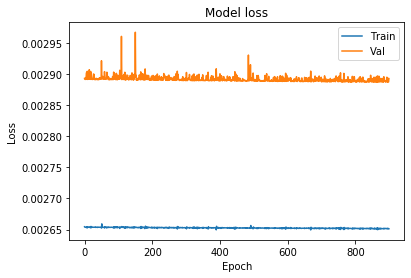

In [22]:
# plotting loss
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

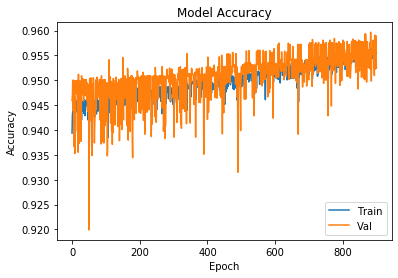

In [26]:
# plotting Accuracy 

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()